In [2]:
# Imports
# from datetime import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Reading data from source and creating df
storm_df = pd.read_csv('data/events-US-1980-2021.csv',
                       header=1,
                       parse_dates=['Begin Date', 'End Date'])

In [4]:
column_rename = {'Total CPI-Adjusted Cost (Millions of Dollars)': 'cost_in_millions'}
storm_df.rename(columns=column_rename, inplace=True)

In [5]:
storm_df.dtypes

Name                        object
Disaster                    object
Begin Date          datetime64[ns]
End Date            datetime64[ns]
cost_in_millions           float64
Deaths                       int64
dtype: object

In [6]:
storm_df['Disaster'].value_counts()

Disaster
Severe Storm        152
Tropical Cyclone     57
Flooding             36
Drought              29
Winter Storm         20
Wildfire             20
Freeze                9
Name: count, dtype: int64

In [7]:
# created columns for day, month and year to assist in future work
# Went with start date as it would be most relevant for investigating, but can change/add to if needed
day_list = [date.day for date in storm_df['Begin Date']]
month_list = [date.month for date in storm_df['Begin Date']]
year_list = [date.year for date in storm_df['Begin Date']]
storm_df['day_start'], storm_df['month_start'], storm_df['year_start'] = day_list, month_list, year_list

In [8]:
# meteorologic seasons are easier to define as they encompass entire months
# can also just do season mapping from the beginning, but like to keep it this way to show different methods and for simplifying steps
met_season_numbers = [month % 12 // 3 + 1 for month in storm_df['month_start']]

season_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}

met_season = [season_mapping[number] for number in met_season_numbers]
storm_df['met_season'] = met_season

In [9]:
# Calendar seasons require more logic
# using a start day of the 21st for each season, 3, 6, 9, 12
cal_season = []

for row in storm_df.itertuples():
    if row.month_start in [1,2]:
        cal_season.append('winter')
    elif row.month_start in [4,5]:
        cal_season.append('spring')
    elif row.month_start in [7,8]:
        cal_season.append('summer')
    elif row.month_start in [10,11]:
        cal_season.append('fall')
        
    elif row.month_start == 3:
        if row.day_start < 21:
            cal_season.append('winter')
        else:
            cal_season.append('spring')
    elif row.month_start == 6:
        if row.day_start < 21:
            cal_season.append('spring')
        else:
            cal_season.append('summer')
    elif row.month_start == 9:
        if row.day_start < 21:
            cal_season.append('summer')
        else:
            cal_season.append('fall')
    elif row.month_start == 12:
        if row.day_start < 21:
            cal_season.append('fall')
        else:
            cal_season.append('winter')

storm_df['cal_season'] = cal_season

In [10]:
storm_df

,Name,Disaster,Begin Date,End Date,cost_in_millions,Deaths,day_start,month_start,year_start,met_season,cal_season
0,Southern Severe Storms and Flooding (April 1980),Flooding,1980-04-10,1980-04-17,2473.8,7,10,4,1980,spring,spring
1,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2012.0,13,7,8,1980,summer,summer
2,Central/Eastern Drought/Heat Wave (Summer-Fall...,Drought,1980-06-01,1980-11-30,36573.0,1260,1,6,1980,summer,spring
3,Florida Freeze (January 1981),Freeze,1981-01-12,1981-01-14,1864.7,0,12,1,1981,winter,winter
4,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1268.6,20,5,5,1981,spring,spring
...,...,...,...,...,...,...,...,...,...,...,...
318,Hurricane Nicholas (September 2021),Tropical Cyclone,2021-09-14,2021-09-18,1056.6,0,14,9,2021,fall,summer
319,"Southeast, Central Tornado Outbreak (December ...",Severe Storm,2021-12-10,2021-12-10,3993.3,93,10,12,2021,winter,fall
320,Midwest Derecho and Tornado Outbreak (December...,Severe Storm,2021-12-15,2021-12-15,1817.6,1,15,12,2021,winter,fall
321,Western Drought and Heat Wave (2021),Drought,2021-01-01,2021-12-31,9105.6,229,1,1,2021,winter,winter


In [11]:
# Filtering the dataset to match the original visualisation
severe_storm_df = storm_df.loc[storm_df['Disaster'] == 'Severe Storm'].copy(deep=True)
severe_storm_df.reset_index(drop=True, inplace=True)

In [12]:
severe_storm_df

,Name,Disaster,Begin Date,End Date,cost_in_millions,Deaths,day_start,month_start,year_start,met_season,cal_season
0,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1268.6,20,5,5,1981,spring,spring
1,Midwest/Plains/Southeast Tornadoes (April 1982),Severe Storm,1982-04-02,1982-04-04,1444.8,33,2,4,1982,spring,spring
2,Severe Storms (June 1982),Severe Storm,1982-05-31,1982-06-10,1420.6,30,31,5,1982,spring,spring
3,"Tornadoes, Severe Storms, Floods (Spring 1984)",Severe Storm,1984-03-27,1984-04-07,1670.5,80,27,3,1984,spring,spring
4,Severe Storms and Hail (June 1984),Severe Storm,1984-06-13,1984-06-17,1222.6,1,13,6,1984,summer,spring
...,...,...,...,...,...,...,...,...,...,...,...
147,Central Severe Storms (June 2021),Severe Storm,2021-06-24,2021-06-26,1303.0,0,24,6,2021,summer,summer
148,Central Severe Storms (July 2021),Severe Storm,2021-07-08,2021-07-11,1123.2,0,8,7,2021,summer,summer
149,North Central Severe Weather (August 2021),Severe Storm,2021-08-10,2021-08-13,1335.3,2,10,8,2021,summer,summer
150,"Southeast, Central Tornado Outbreak (December ...",Severe Storm,2021-12-10,2021-12-10,3993.3,93,10,12,2021,winter,fall


In [13]:
met_group = severe_storm_df.groupby('met_season')['cost_in_millions'].sum()
print(met_group)

met_season
fall       13503.6
spring    231182.2
summer     72123.2
winter     28114.1
Name: cost_in_millions, dtype: float64


In [30]:
# Change the order of the seasons to be chronological instead of alphabetical
season_order = ['spring', 'summer', 'fall', 'winter']
met_group_sorted = met_group.loc[season_order]
print(met_group_sorted)

met_season
spring    231182.2
summer     72123.2
fall       13503.6
winter     28114.1
Name: cost_in_millions, dtype: float64


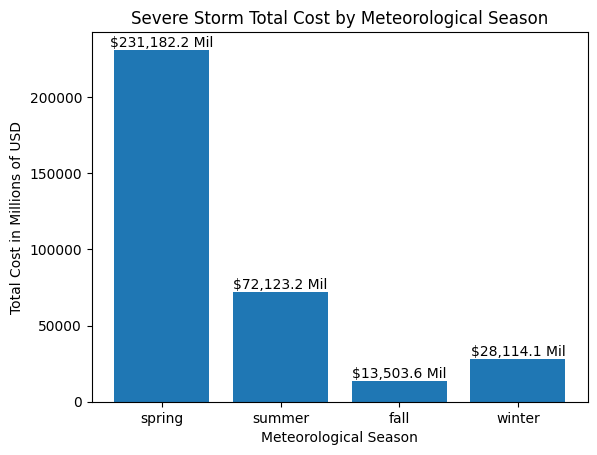

In [62]:
bars = plt.bar(met_group_sorted.index, met_group_sorted.values)

# Annotate the bars with their values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'${height:,} Mil', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 0),  # change y for vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.title('Severe Storm Total Cost by Meteorological Season')
plt.xlabel('Meteorological Season')
plt.ylabel('Total Cost in Millions of USD')
plt.xticks(rotation=0)
plt.show()

In [63]:
cal_group = severe_storm_df.groupby('cal_season')['cost_in_millions'].sum()
cal_group_sorted = cal_group.loc[season_order]
print(cal_group_sorted)

cal_season
spring    240827.0
summer     44541.5
fall       21082.5
winter     38472.1
Name: cost_in_millions, dtype: float64


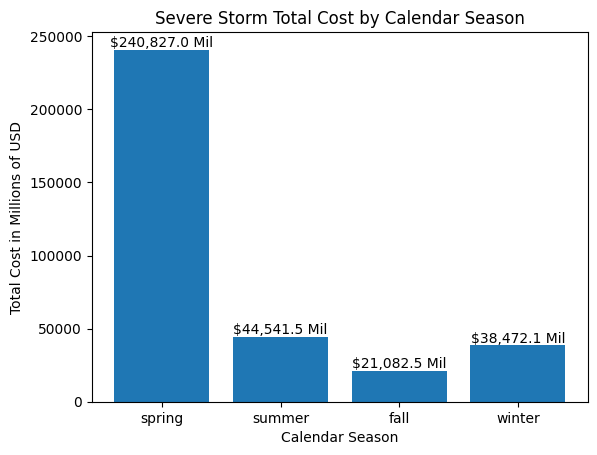

In [66]:
bars = plt.bar(cal_group_sorted.index, cal_group_sorted.values)

# Annotate the bars with their values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'${height:,} Mil', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 0),  # change y for vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.title('Severe Storm Total Cost by Calendar Season')
plt.xlabel('Calendar Season')
plt.ylabel('Total Cost in Millions of USD')
plt.xticks(rotation=0)
plt.show()

In [15]:
severe_storm_df[severe_storm_df['met_season'] == 'spring']
# severe_storm_df[severe_storm_df['met_season'] == 'summer']
# severe_storm_df[severe_storm_df['met_season'] == 'fall']
# severe_storm_df[severe_storm_df['met_season'] == 'winter']


,Name,Disaster,Begin Date,End Date,cost_in_millions,Deaths,day_start,month_start,year_start,met_season,cal_season
0,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1268.6,20,5,5,1981,spring,spring
1,Midwest/Plains/Southeast Tornadoes (April 1982),Severe Storm,1982-04-02,1982-04-04,1444.8,33,2,4,1982,spring,spring
2,Severe Storms (June 1982),Severe Storm,1982-05-31,1982-06-10,1420.6,30,31,5,1982,spring,spring
3,"Tornadoes, Severe Storms, Floods (Spring 1984)",Severe Storm,1984-03-27,1984-04-07,1670.5,80,27,3,1984,spring,spring
5,Ohio and Pennsylvania Tornado Outbreak (June 1...,Severe Storm,1985-05-31,1985-05-31,1584.0,89,31,5,1985,spring,spring
...,...,...,...,...,...,...,...,...,...,...,...
141,Southeast Tornadoes and Severe Weather (March ...,Severe Storm,2021-03-24,2021-03-25,1794.6,6,24,3,2021,spring,spring
142,Eastern Severe Weather (March 2021),Severe Storm,2021-03-27,2021-03-28,1440.5,8,27,3,2021,spring,spring
143,Texas Hail Storms (April 2021),Severe Storm,2021-04-12,2021-04-15,1578.3,0,12,4,2021,spring,spring
144,Texas and Oklahoma Severe Weather (April 2021),Severe Storm,2021-04-27,2021-04-28,3369.5,0,27,4,2021,spring,spring


In [16]:
cyclone_df = storm_df.loc[storm_df['Disaster'] == 'Tropical Cyclone'].copy(deep=True)
cyclone_df.reset_index(drop=True, inplace=True)

In [17]:
cyclone_df

,Name,Disaster,Begin Date,End Date,cost_in_millions,Deaths,day_start,month_start,year_start,met_season,cal_season
0,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2012.0,13,7,8,1980,summer,summer
1,Hurricane Alicia (August 1983),Tropical Cyclone,1983-08-17,1983-08-20,8490.0,21,17,8,1983,summer,summer
2,Hurricane Elena (September 1985),Tropical Cyclone,1985-08-30,1985-09-03,3412.1,4,30,8,1985,summer,summer
3,Hurricane Gloria (September 1985),Tropical Cyclone,1985-09-26,1985-09-28,2242.9,11,26,9,1985,fall,fall
4,Hurricane Juan (October 1985),Tropical Cyclone,1985-10-27,1985-10-31,3906.5,63,27,10,1985,fall,fall
5,Tropical Storm Allison (June 1989),Tropical Cyclone,1989-06-26,1989-06-28,1339.7,11,26,6,1989,summer,summer
6,Hurricane Hugo (September 1989),Tropical Cyclone,1989-09-21,1989-09-22,20429.7,86,21,9,1989,fall,fall
7,Hurricane Bob (August 1991),Tropical Cyclone,1991-08-18,1991-08-20,3126.0,18,18,8,1991,summer,summer
8,Hurricane Andrew (August 1992),Tropical Cyclone,1992-08-23,1992-08-27,54270.0,61,23,8,1992,summer,summer
9,Hurricane Iniki (September 1992),Tropical Cyclone,1992-09-11,1992-09-12,6231.0,7,11,9,1992,fall,summer


In [18]:
cyc_met_group = cyclone_df.groupby('met_season')['cost_in_millions'].sum()
print(cyc_met_group)

met_season
fall      569289.8
summer    587945.4
Name: cost_in_millions, dtype: float64


In [19]:
cyc_cal_group = cyclone_df.groupby('cal_season')['cost_in_millions'].sum()
print(cyc_cal_group)

cal_season
fall      193170.3
spring     13550.0
summer    950514.9
Name: cost_in_millions, dtype: float64


In [20]:
# September cyclones
# I noticed that the summer figures changed drastically when the calendar season definitions were used as opposed to the meteorological definitions. Out of curiosity, I wanted to see how much those 20 days affected the outcome.

sept_cyclones = cyclone_df[(cyclone_df['month_start'] == 9) & (cyclone_df['day_start'] < 21)]
sept_cyclones

,Name,Disaster,Begin Date,End Date,cost_in_millions,Deaths,day_start,month_start,year_start,met_season,cal_season
9,Hurricane Iniki (September 1992),Tropical Cyclone,1992-09-11,1992-09-12,6231.0,7,11,9,1992,fall,summer
12,Hurricane Marilyn (September 1995),Tropical Cyclone,1995-09-15,1995-09-17,3885.0,13,15,9,1995,fall,summer
14,Hurricane Fran (September 1996),Tropical Cyclone,1996-09-05,1996-09-08,9012.6,37,5,9,1996,fall,summer
17,Hurricane Georges (September 1998),Tropical Cyclone,1998-09-20,1998-09-29,10353.2,16,20,9,1998,fall,summer
18,Hurricane Floyd (September 1999),Tropical Cyclone,1999-09-14,1999-09-16,10969.9,77,14,9,1999,fall,summer
22,Hurricane Isabel (September 2003),Tropical Cyclone,2003-09-18,2003-09-19,8390.6,55,18,9,2003,fall,summer
24,Hurricane Frances (September 2004),Tropical Cyclone,2004-09-03,2004-09-09,14601.9,48,3,9,2004,fall,summer
25,Hurricane Ivan (September 2004),Tropical Cyclone,2004-09-12,2004-09-21,30545.8,57,12,9,2004,fall,summer
26,Hurricane Jeanne (September 2004),Tropical Cyclone,2004-09-15,2004-09-29,11169.8,28,15,9,2004,fall,summer
29,Hurricane Rita (September 2005),Tropical Cyclone,2005-09-20,2005-09-24,26455.1,119,20,9,2005,fall,summer


In [21]:
print(f'Cost of September Calendar Summer Cyclones: ${sept_cyclones["cost_in_millions"].sum()} million\n'
      f'Percent of total Cyclone Damage: {sept_cyclones["cost_in_millions"].sum()/cyclone_df["cost_in_millions"].sum():.2%}')

Cost of September Calendar Summer Cyclones: $376119.5 million
Percent of total Cyclone Damage: 32.50%


In [ ]:
# Combined Storms
# Cyclones (hurricanes) seem to be the most damaging storm type, so I wonder how the figures look counting all storm types together. This distinction not only includes both 'severe storms' and 'tropical cyclones', but also incorporates 'winter storms' since the data is available.

In [22]:
all_storms_df = storm_df.loc[(storm_df['Disaster'] == 'Tropical Cyclone') | (storm_df['Disaster'] == 'Winter Storm') | (storm_df['Disaster'] == 'Severe Storm')].copy(deep=True)
all_storms_df.reset_index(drop=True, inplace=True)

In [23]:
all_storms_df

,Name,Disaster,Begin Date,End Date,cost_in_millions,Deaths,day_start,month_start,year_start,met_season,cal_season
0,Hurricane Allen (August 1980),Tropical Cyclone,1980-08-07,1980-08-11,2012.0,13,7,8,1980,summer,summer
1,"Severe Storms, Flash Floods, Hail, Tornadoes (...",Severe Storm,1981-05-05,1981-05-10,1268.6,20,5,5,1981,spring,spring
2,"Midwest/Southeast/Northeast Winter Storm, Cold...",Winter Storm,1982-01-08,1982-01-16,1992.7,85,8,1,1982,winter,winter
3,Midwest/Plains/Southeast Tornadoes (April 1982),Severe Storm,1982-04-02,1982-04-04,1444.8,33,2,4,1982,spring,spring
4,Severe Storms (June 1982),Severe Storm,1982-05-31,1982-06-10,1420.6,30,31,5,1982,spring,spring
...,...,...,...,...,...,...,...,...,...,...,...
224,Tropical Storm Fred (August 2021),Tropical Cyclone,2021-08-16,2021-08-18,1328.1,7,16,8,2021,summer,summer
225,Hurricane Ida (August 2021),Tropical Cyclone,2021-08-29,2021-09-01,76514.9,96,29,8,2021,summer,summer
226,Hurricane Nicholas (September 2021),Tropical Cyclone,2021-09-14,2021-09-18,1056.6,0,14,9,2021,fall,summer
227,"Southeast, Central Tornado Outbreak (December ...",Severe Storm,2021-12-10,2021-12-10,3993.3,93,10,12,2021,winter,fall


In [24]:
all_met_group = all_storms_df.groupby('met_season')['cost_in_millions'].sum()
print(all_met_group)

met_season
fall      583949.8
spring    244626.8
summer    660068.6
winter     94437.6
Name: cost_in_millions, dtype: float64


In [25]:
all_cal_group = all_storms_df.groupby('cal_season')['cost_in_millions'].sum()
print(all_cal_group)

cal_season
fall      220375.2
spring    254377.0
summer    995056.4
winter    113274.2
Name: cost_in_millions, dtype: float64


In [28]:
# Storm Cost by Month
# Season may not be the best way to group the costs, so I am interested to see the seasonal costs and compare against different storm types

all_month_group = all_storms_df.groupby('month_start')['cost_in_millions'].sum()
print(all_month_group)

month_start
1      26444.2
2      51563.5
3      53997.9
4      97674.2
5      92954.7
6      50403.7
7      27823.6
8     581841.3
9     402264.1
10    176326.5
11      5359.2
12     16429.9
Name: cost_in_millions, dtype: float64


In [38]:
# TODO Add visualizations for most interesting data points
# all storm types for cal season? Months instead?
# Pie chart for all damage? Pie for cal/met seasons?